Data Preparation

In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2023-11-05 15:09:42.263780: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Num GPUs Available:  0


In [2]:
import torch
print(f'PyTorch version: {torch.__version__}')
print('*'*10)
print(f'_CUDA version: ')
!nvcc --version
print('*'*10)
print(f'CUDNN version: {torch.backends.cudnn.version()}')
print(f'Available GPU devices: {torch.cuda.device_count()}')
print(f'Device Name: {torch.cuda.get_device_name()}')

ModuleNotFoundError: No module named 'torch'

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_ta as ta
df = pd.read_csv('Stocks Dataset/TSLA.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3347,2023-10-16,250.050003,255.399994,248.479996,253.919998,253.919998,88917200
3348,2023-10-17,250.100006,257.179993,247.080002,254.850006,254.850006,93562900
3349,2023-10-18,252.699997,254.630005,242.080002,242.679993,242.679993,125147800
3350,2023-10-19,225.949997,230.610001,216.779999,220.110001,220.110001,170772700


In [59]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

In [60]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

0      2010-06-29
1      2010-06-30
2      2010-07-01
3      2010-07-02
4      2010-07-06
          ...    
3347   2023-10-16
3348   2023-10-17
3349   2023-10-18
3350   2023-10-19
3351   2023-10-20
Name: Date, Length: 3352, dtype: datetime64[ns]

In [61]:
df.index = df.pop('Date')

In [62]:
def start_to_end_date(dataframe, start_date, end_date):
    data = dataframe.loc[start_date:end_date]
    data_copy = data.copy(deep=True)
    return data_copy

data = start_to_end_date(df, '2010-06-29', '2023-10-20')
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2023-10-16,250.050003,255.399994,248.479996,253.919998,253.919998,88917200
2023-10-17,250.100006,257.179993,247.080002,254.850006,254.850006,93562900
2023-10-18,252.699997,254.630005,242.080002,242.679993,242.679993,125147800


Data Visualization

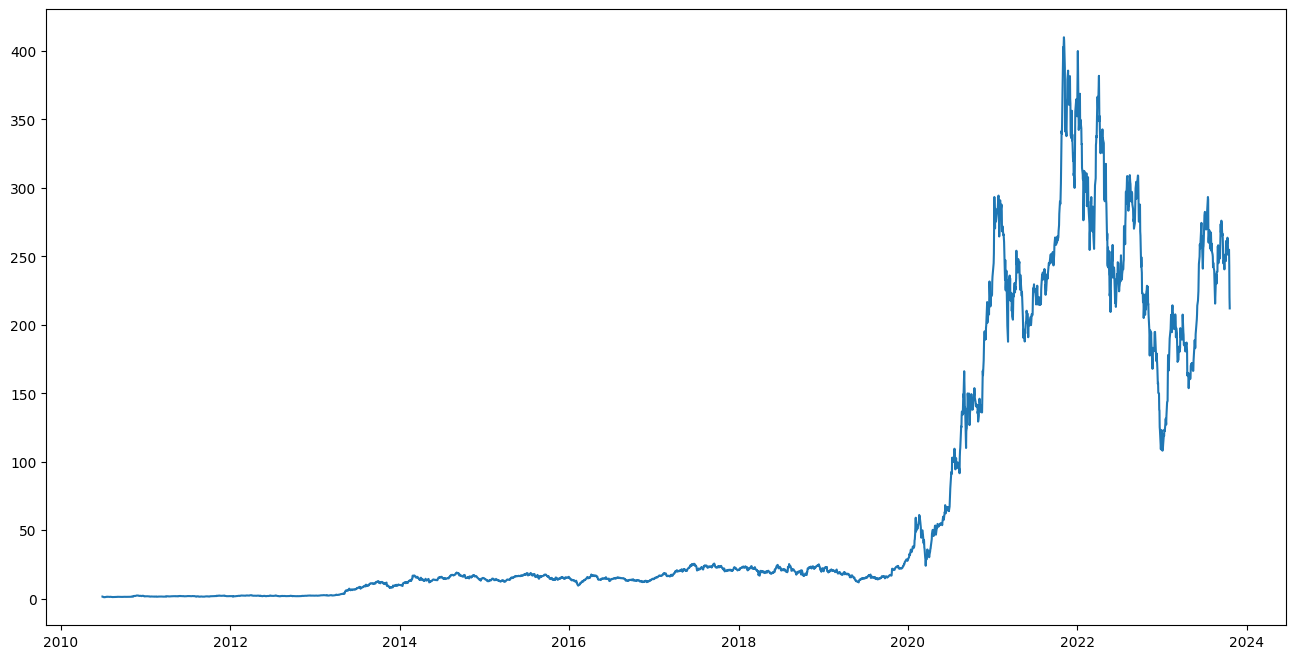

In [63]:
plt.figure(figsize=(16, 8))
plt.plot(data.index, data['Close'])
plt.show()

In [64]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

#data['Target'] = data['Adj Close']-data.Open
#data['Target'] = data['Target'].shift(-1)

#data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)

In [65]:
data_set = data.iloc[:, 0:9]#.values
pd.set_option('display.max_columns', None)

# data_set.head(5)
print(data_set.shape)
#print(data.shape)
#print(type(data_set))

(3202, 9)


In [66]:
#Target column Categories
#y =[1 if data.Open[i]>data.Close[i] else 0 for i in range(0, len(data))]
#yi = [data.Open[i]-data.Close[i] for i in range(0, len(data))]
#print(yi)
#print(len(yi))

In [78]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[3.69088673e-04 2.98618437e-04 3.94138096e-04 ... 2.39992745e-04
  2.30423067e-05 3.39441912e-04]
 [4.11364866e-04 3.97082887e-04 4.00732873e-04 ... 2.33604666e-04
  2.37925566e-05 3.44337697e-04]
 [3.86975693e-04 3.08303385e-04 4.22172082e-04 ... 2.27467060e-04
  2.46189949e-05 2.93747102e-04]
 ...
 [6.06431926e-01 6.19099013e-01 6.07710583e-01 ... 7.58858642e-01
  7.64105147e-01 5.90492041e-01]
 [6.12773089e-01 6.12924888e-01 5.95342285e-01 ... 7.58774780e-01
  7.64367446e-01 5.35243126e-01]
 [5.47532051e-01 5.54766763e-01 5.32758687e-01 ... 7.57293487e-01
  7.63654343e-01 5.15366249e-01]]


In [79]:
# multiple feature from data provided to the model
X = []
col_size = data_set_scaled[0].size
#data_set_scaled=data_set.values

#backcandles = days used by AI to predict
backcandles = 30
for j in range(col_size):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

print(X.shape)
print(y.shape)

(3172, 30, 9)
(3172, 1)


In [69]:
#also comprehensions for X
#X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
#print(X)
#print(X.shape)

In [80]:
# split data into train test sets
splitlimit = int(len(X)*0.9)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


2854
(2854, 30, 9)
(318, 30, 9)
(2854, 1)
(318, 1)


Running the AI

In [1]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[]


In [81]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(20)

lstm_input = Input(shape=(backcandles, col), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('relu', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam(learning_rate=0.001)
model.summary()
model.compile(optimizer=adam, loss='mse', metrics='accuracy')
model.fit(x=X_train, y=y_train, epochs=100, shuffle=True, validation_split = 0.1, use_multiprocessing=True)

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_input (InputLayer)     [(None, 30, 9)]           0         
                                                                 
 first_layer (LSTM)          (None, 150)               96000     
                                                                 
 dense_layer (Dense)         (None, 1)                 151       
                                                                 
 output (Activation)         (None, 1)                 0         
                                                                 
Total params: 96151 (375.59 KB)
Trainable params: 96151 (375.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
81/81 [==============================] - 4s 25ms/step - loss: 0.0017 - accuracy: 0.0000e+00 - val_loss: 0.0041 - val_accuracy: 0.0035
Epoch 

In [82]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

10/10 [==============================] - 1s 10ms/step
[0.56677186] [0.59746855]
[0.5707513] [0.6022909]
[0.56945896] [0.66154621]
[0.62293994] [0.66285995]
[0.62964237] [0.65353341]
[0.63901526] [0.63009892]
[0.6152175] [0.66916734]
[0.64592975] [0.6840505]
[0.6510683] [0.72382875]
[0.6962919] [0.72413884]


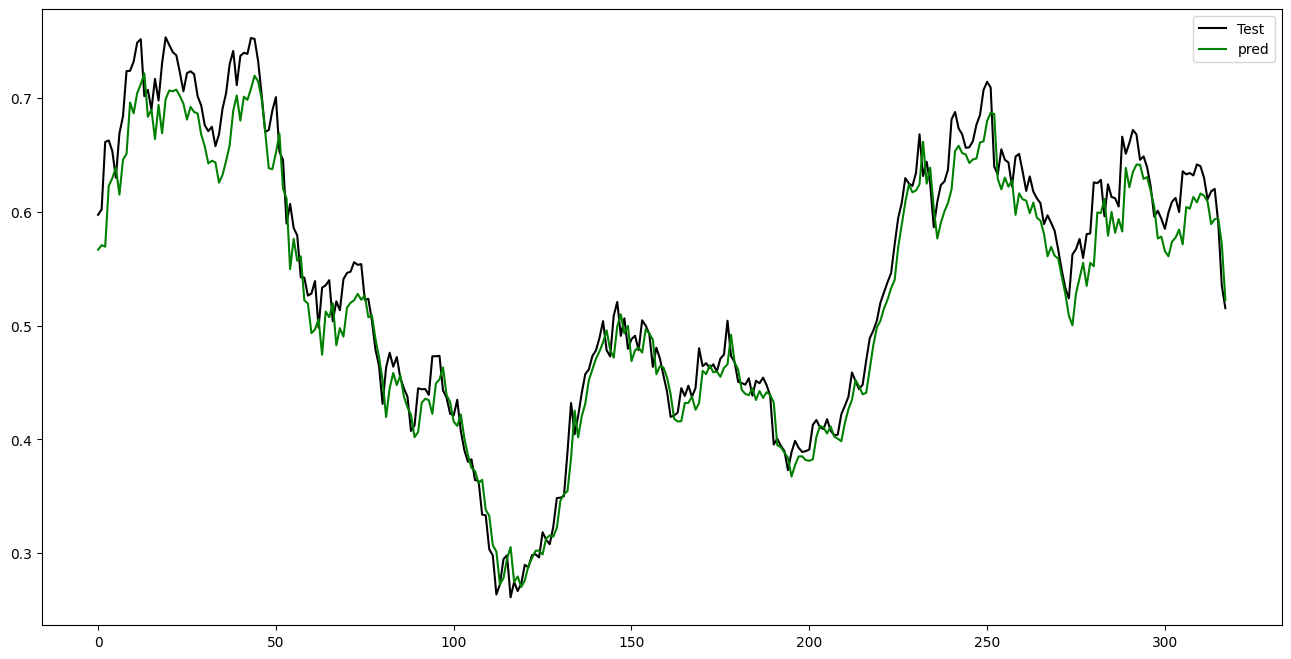

In [85]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()